<a href="https://colab.research.google.com/github/hugopedro-ds/Quantum-finance-ML/blob/main/notebooks/trabalho_de_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Quantum Finance - Exploração de Dados e Machine Learning:

 - Atuámos como analistas da Quantum Finance para explorar a base Credit Score Classification (Kaggle) e gerar valor a partir dos dados.

 - Realizámos uma EDA para compreender as variáveis, avaliar a qualidade da informação e identificar padrões relevantes.

 - Em seguida, desenvolvemos e comparamos modelos supervisionados para prever a classificação do credit score, avaliando o desempenho com métricas como acurácia, F1-score e matriz de confusão.

 - Por fim, implementámos uma segunda abordagem (não supervisionada, como K-Means/PCA, ou um sistema especialista baseado em regras), documentando resultados, desafios e a utilidade prática para apoiar decisões financeiras.

Importação da Base de Dados do KAGGLE

In [ ]:
import kagglehub, os
import pandas as pd

path = kagglehub.dataset_download("parisrohan/credit-score-classification")
print("Dataset path:", path)
print("Arquivos:", os.listdir(path))

df = pd.read_csv(os.path.join(path, "train.csv"), low_memory=False)
df.head()



Using Colab cache for faster access to the 'credit-score-classification' dataset.
Dataset path: /kaggle/input/credit-score-classification
Arquivos: ['train.csv', 'test.csv']


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


Carregando a Base de Dados no Pandas

In [ ]:
import pandas as pd

train_path = f"{path}/train.csv"
test_path  = f"{path}/test.csv"

df_train = pd.read_csv(train_path, low_memory=False)
df_test  = pd.read_csv(test_path, low_memory=False)

print(df_train.shape, df_test.shape)
df_train.head()


(100000, 28) (50000, 27)


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


EDA - Análise Exploratória de Dados

In [ ]:
# Visão geral
display(df_train.head())
print(df_train.info())

# Target (classe)
print(df_train["Credit_Score"].value_counts())
print(df_train["Credit_Score"].value_counts(normalize=True).round(3))

# Missing
missing = df_train.isna().mean().sort_values(ascending=False)
print(missing.head(15))


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Separamos por cliente, e assim todos os registros de um cliente ficam só no treino ou só no teste.

Usamos a técnica/método GroupShuffleSplit ou GroupKFold com groups = Customer_ID.

Removemos o Customer_ID das features para o modelo não memorizar o identificador.

In [ ]:
import re
import numpy as np
import pandas as pd

from sklearn.model_selection import GroupShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# -----------------------------
# 1) Load
# -----------------------------
df = pd.read_csv(train_path, low_memory=False)

# Target
target = "Credit_Score"
group_col = "Customer_ID"

# -----------------------------
# 2) Limpeza básica
# -----------------------------
def to_numeric_clean(s):
    # Remove caracteres estranhos; mantém dígitos, sinal e ponto
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    s = re.sub(r"[^0-9\.\-]", "", s)
    if s == "" or s == "-" or s == ".":
        return np.nan
    return float(s)

def credit_history_age_to_months(x):
    # Ex.: "22 Years and 3 Months" -> 22*12 + 3
    if pd.isna(x):
        return np.nan
    x = str(x)
    m = re.search(r"(\d+)\s*Years?\s*and\s*(\d+)\s*Months?", x)
    if not m:
        return np.nan
    years = int(m.group(1))
    months = int(m.group(2))
    return years * 12 + months

# Colunas que geralmente vêm como "object" mas deveriam ser numéricas
maybe_numeric = [
    "Age","Annual_Income","Monthly_Inhand_Salary","Num_of_Loan",
    "Num_of_Delayed_Payment","Changed_Credit_Limit","Outstanding_Debt",
    "Amount_invested_monthly","Monthly_Balance"
]

for c in maybe_numeric:
    if c in df.columns:
        df[c] = df[c].apply(to_numeric_clean)

if "Credit_History_Age" in df.columns:
    df["Credit_History_Age_Months"] = df["Credit_History_Age"].apply(credit_history_age_to_months)

# Remover colunas com alto risco de identificação / pouco valor preditivo direto
drop_cols = [c for c in ["ID", "Name", "SSN", "Credit_History_Age"] if c in df.columns]
df = df.drop(columns=drop_cols)

# -----------------------------
# 3) Split por grupo (Customer_ID)
# -----------------------------
X = df.drop(columns=[target])
y = df[target]
groups = df[group_col].values

gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=groups))

X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
y_train, y_test = y.iloc[train_idx].copy(), y.iloc[test_idx].copy()

# Remover group_col das features (para não “memorizar” cliente)
X_train = X_train.drop(columns=[group_col])
X_test  = X_test.drop(columns=[group_col])

# -----------------------------
# 4) Preprocess: num + cat
# -----------------------------
num_cols = X_train.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False)) # Set sparse_output=False here
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols),
    ]
)

# -----------------------------
# 5) Modelos para comparar
# -----------------------------
models = {
    "LogReg": LogisticRegression(max_iter=2000, class_weight="balanced"),
    "DecisionTree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "RandomForest": RandomForestClassifier(
        n_estimators=300, random_state=42, class_weight="balanced_subsample", n_jobs=-1
    ),
    "HistGB": HistGradientBoostingClassifier(random_state=42)
}

results = []
fitted_pipes = {} # Initialize dictionary to store fitted pipelines

for name, clf in models.items():
    pipe = Pipeline(steps=[("prep", preprocess), ("model", clf)])
    pipe.fit(X_train, y_train)
    fitted_pipes[name] = pipe # Store the fitted pipe

    pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, pred)
    f1m = f1_score(y_test, pred, average="macro")
    results.append((name, acc, f1m))

    print("\n======================")
    print(name)
    print("Accuracy:", round(acc, 4))
    print("F1-macro:", round(f1m, 4))
    print("Confusion matrix:\n", confusion_matrix(y_test, pred))
    print("Report:\n", classification_report(y_test, pred))

results = pd.DataFrame(results, columns=["model","accuracy","f1_macro"]).sort_values("f1_macro", ascending=False)
results


LogReg
Accuracy: 0.6109
F1-macro: 0.6046
Confusion matrix:
 [[2863  203  628]
 [ 714 3302 1710]
 [2210 2318 6052]]
Report:
               precision    recall  f1-score   support

        Good       0.49      0.78      0.60      3694
        Poor       0.57      0.58      0.57      5726
    Standard       0.72      0.57      0.64     10580

    accuracy                           0.61     20000
   macro avg       0.59      0.64      0.60     20000
weighted avg       0.64      0.61      0.61     20000


DecisionTree
Accuracy: 0.6214
F1-macro: 0.5952
Confusion matrix:
 [[1870  349 1475]
 [ 363 3661 1702]
 [1513 2169 6898]]
Report:
               precision    recall  f1-score   support

        Good       0.50      0.51      0.50      3694
        Poor       0.59      0.64      0.62      5726
    Standard       0.68      0.65      0.67     10580

    accuracy                           0.62     20000
   macro avg       0.59      0.60      0.60     20000
weighted avg       0.62      0.62    

,model,accuracy,f1_macro
3,HistGB,0.70540,0.685306
2,RandomForest,0.68590,0.664896
0,LogReg,0.61085,0.604610
1,DecisionTree,0.62145,0.595216


Permutation Importance para o melhor modelo (HistGB)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance

best_model_name = "HistGB"

best_pipe = Pipeline(steps=[
    ("prep", preprocess),
    ("model", HistGradientBoostingClassifier(random_state=42))
])

best_pipe.fit(X_train, y_train)

perm = permutation_importance(
    best_pipe, X_test, y_test,
    n_repeats=2, random_state=42, n_jobs=-1
)

imp = perm.importances_mean

# Use original feature names from X_test as permutation importance is calculated on raw input features
feature_names = X_test.columns

imp_df = pd.DataFrame({"feature": feature_names, "importance": imp}) \
            .sort_values("importance", ascending=False)

imp_df.head(20)


,feature,importance
14,Credit_Mix,0.084000
15,Outstanding_Debt,0.078100
7,Interest_Rate,0.070400
10,Delay_from_due_date,0.042650
6,Num_Credit_Card,0.024675
12,Changed_Credit_Limit,0.020650
17,Payment_of_Min_Amount,0.015675
22,Credit_History_Age_Months,0.012900
18,Total_EMI_per_month,0.008775
5,Num_Bank_Accounts,0.005750


Gráfico top 15 para slide

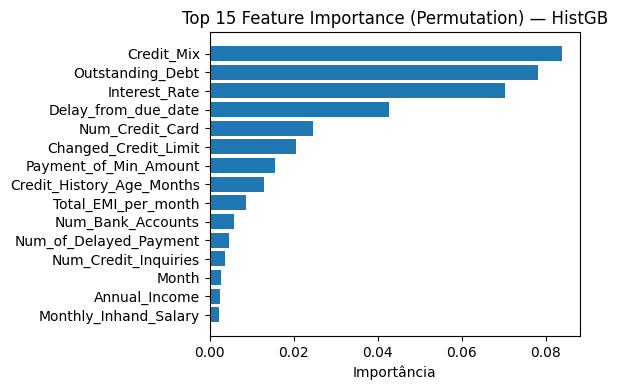

In [ ]:
import matplotlib.pyplot as plt

top = imp_df.head(15).iloc[::-1]

plt.figure(figsize=(6, 4))
plt.barh(top["feature"], top["importance"])
plt.title(f"Top 15 Feature Importance (Permutation) — {best_model_name}")
plt.xlabel("Importância")
plt.tight_layout()
plt.show()

 - Melhor modelo: HistGradientBoosting (HistGB), com F1-macro = 0,685 e acurácia = 0,705.

 - Interpretação: aplicamos Permutation Importance, que mede quanto o desempenho do modelo piora ao embaralhar cada variável.

 - Principais drivers do score:
    - Credit_Mix, Outstanding_Debt;
    - Interest_Rate;
    - Delay_from_due_date;
    - Changed_Credit_Limit;
    - Payment_of_Min_Amount;
    - Credit_History_Age_Months.

 - Implicação para decisão: risco tende a aumentar com maior endividamento, juros mais altos e atrasos; esses perfis devem ser priorizados para revisão, limite menor, condições mais conservadoras ou análise manual.

Agregar por Customer_ID

In [ ]:
import numpy as np
import pandas as pd

target = "Credit_Score"
group_col = "Customer_ID"

df2 = df.copy()  # df precisa ter Customer_ID e Credit_Score

def mode_or_nan(s):
    m = s.mode()
    return m.iloc[0] if len(m) else np.nan

# separa X e y
y_rows = df2[target]
X_rows = df2.drop(columns=[target])

num_cols_all = X_rows.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_cols_all = X_rows.select_dtypes(include=["object"]).columns.tolist()

# Remove group_col from cat_cols_all to avoid duplication
cat_cols_for_agg = [col for col in cat_cols_all if col != group_col]

# agrega
agg_num = X_rows.groupby(group_col)[num_cols_all].median()
agg_cat = X_rows.groupby(group_col)[cat_cols_for_agg].apply(lambda x: x.apply(mode_or_nan))

df_customer = pd.concat([agg_num, agg_cat], axis=1).reset_index()

# target por cliente (moda das linhas)
y_customer = df2.groupby(group_col)[target].apply(mode_or_nan) \
               .loc[df_customer[group_col]].values

print("Clientes (linhas):", df_customer.shape)


Clientes (linhas): (12500, 24)


Abordagem não Supervisionada: K-Means para Segmentação de Clientes

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Preparar os dados para K-Means
# df_customer contém Customer_ID e as features agregadas

X_customer = df_customer.drop(columns=[group_col])

# Identificar colunas numéricas e categóricas em X_customer
num_cols_customer = X_customer.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols_customer = X_customer.select_dtypes(include=["object"]).columns.tolist()

# Pipeline de pré-processamento para K-Means
# Para K-Means, é importante escalar e tratar missing values.
# OneHotEncoder para categóricas (o K-Means lida melhor com dados numéricos)

preprocess_kmeans = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols_customer),
        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
        ]), cat_cols_customer)
    ],
    remainder="passthrough"
)

# Aplicar pré-processamento
X_customer_processed = preprocess_kmeans.fit_transform(X_customer)

# Determinar o número ideal de clusters usando o método do cotovelo (Elbow Method)
# Vamos testar de 2 a 10 clusters e plotar a inércia

# No entanto, para evitar uma execução muito longa, definimos um número de clusters por enquanto.
# Uma análise mais aprofundada do método do cotovelo pode ser feita posteriormente.
# Para este exemplo, vamos começar com 3 clusters (Good, Standard, Poor sugerem 3)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Treinar o K-Means
kmeans.fit(X_customer_processed)

# Adicionar os rótulos dos clusters ao DataFrame original do cliente
df_customer['Cluster'] = kmeans.labels_

print("Contagem de clientes por Cluster:")
print(df_customer['Cluster'].value_counts())

df_customer.head()


Contagem de clientes por Cluster:
Cluster
2    5629
1    4183
0    2688
Name: count, dtype: int64


,Customer_ID,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months,Month,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Cluster
0,CUS_0x1000,17.0,30625.94,2706.161667,6.0,5.0,27.0,2.0,62.0,25.0,...,145.467484,340.080534,125.5,April,Lawyer,"Credit-Builder Loan, and Home Equity Loan",Bad,Yes,High_spent_Medium_value_payments,1
1,CUS_0x1009,26.0,52312.68,4250.390000,6.0,5.0,17.0,4.0,8.0,18.0,...,152.968494,417.869641,369.0,April,Mechanic,"Not Specified, Home Equity Loan, Credit-Builde...",Standard,Yes,High_spent_Medium_value_payments,2
2,CUS_0x100b,18.5,113781.39,9549.782500,1.0,4.0,1.0,0.0,14.0,7.0,...,617.079267,824.355725,187.0,April,Media_Manager,NaN,Good,No,High_spent_Large_value_payments,0
3,CUS_0x1011,44.0,58918.47,5208.872500,3.0,3.0,17.0,3.0,27.0,15.0,...,413.774336,263.677975,186.5,April,Doctor,"Student Loan, Credit-Builder Loan, and Debt Co...",Standard,Yes,Low_spent_Medium_value_payments,2
4,CUS_0x1013,44.0,98620.98,7962.415000,3.0,3.0,6.0,3.0,12.0,9.0,...,320.088813,513.134603,210.0,April,Mechanic,"Student Loan, Debt Consolidation Loan, and Per...",Good,No,High_spent_Medium_value_payments,0


### Análise dos Clusters


Resumo numérico dos Clusters (Mediana):
          Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
Cluster                                                                  
0        36.0     106779.785            8870.880000                4.0   
1        29.5      20756.690            1870.562500                8.0   
2        35.0      31748.670            2629.466667                4.0   

         Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
Cluster                                                                     
0                    5.0            8.0          2.0                 12.0   
1                    7.0           24.0          6.0                 33.0   
2                    5.0           10.0          2.0                 13.0   

         Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
Cluster                                                                       
0                           9.0             

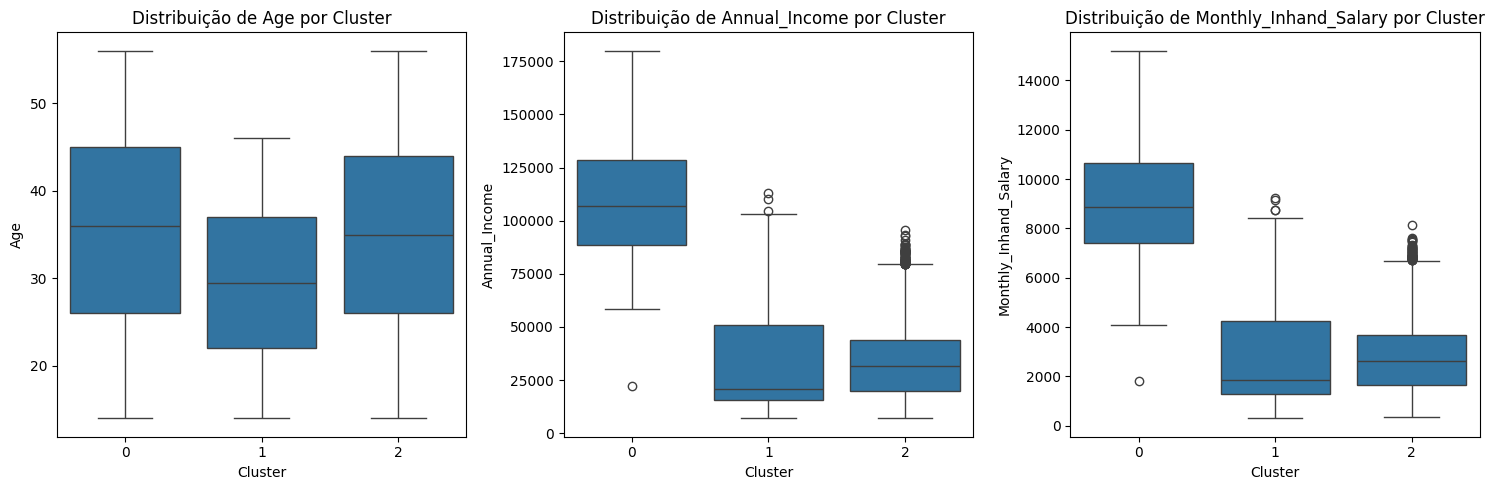

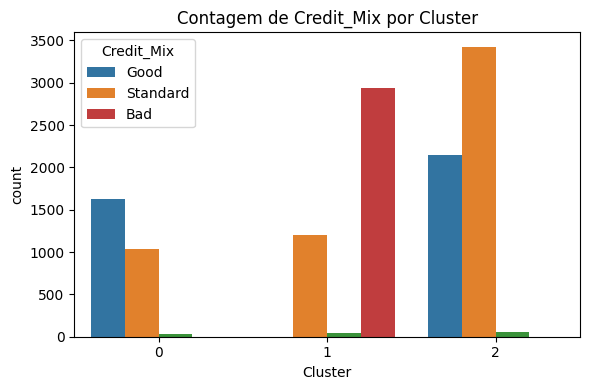

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Para facilitar a análise, podemos converter de volta algumas colunas one-hot ou pegar a moda
# No entanto, para uma análise exploratória rápida, pegamos a média/mediana para numéricas e a moda para categóricas por cluster.

# Desfazendo o preprocessamento para visualização (opcional, pode ser complexo)
# Alternativamente, podemos analisar os dados originais agrupados por cluster

# Vamos analisar as características médias/moda de cada cluster no df_customer original
cluster_summary_num = df_customer.groupby('Cluster')[num_cols_customer].median()
cluster_summary_cat = df_customer.groupby('Cluster')[cat_cols_customer].apply(lambda x: x.mode().iloc[0]) # Pega a moda

print("\nResumo numérico dos Clusters (Mediana):")
print(cluster_summary_num)

print("\nResumo categórico dos Clusters (Moda):")
print(cluster_summary_cat)

# Visualização de algumas features numéricas por cluster
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols_customer[:3]): # Plotar as 3 primeiras features numéricas
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Cluster', y=col, data=df_customer)
    plt.title(f'Distribuição de {col} por Cluster')
plt.tight_layout()
plt.show()

# Visualização de algumas features categóricas por cluster (exemplo: Credit_Mix)
if 'Credit_Mix' in cat_cols_customer:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Cluster', hue='Credit_Mix', data=df_customer)
    plt.title('Contagem de Credit_Mix por Cluster')
    plt.tight_layout()
    plt.show()


Preprocess + Redução (PCA ou SVD)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from scipy.sparse import issparse

Xc = df_customer.drop(columns=[group_col])

num_c = Xc.select_dtypes(include=["int64","float64"]).columns.tolist()
cat_c = Xc.select_dtypes(include=["object"]).columns.tolist()

preprocess_c = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("imp", SimpleImputer(strategy="median")),
                          ("sc", StandardScaler())]), num_c),
        ("cat", Pipeline([("imp", SimpleImputer(strategy="most_frequent")),
                          ("oh", OneHotEncoder(handle_unknown="ignore"))]), cat_c),
    ]
)

Xc_ready = preprocess_c.fit_transform(Xc)

# PCA para denso, SVD para sparse (mais estável)
n_comp = 10

if issparse(Xc_ready):
    from sklearn.decomposition import TruncatedSVD
    reducer = TruncatedSVD(n_components=n_comp, random_state=42)
else:
    from sklearn.decomposition import PCA
    reducer = PCA(n_components=n_comp, random_state=42)

Xc_red = reducer.fit_transform(Xc_ready)

print("Dimensão após redução:", Xc_red.shape)


Dimensão após redução: (12500, 10)


KMeans + escolha de k por silhouette

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_k, best_sil = None, -1

for k in range(3, 9):
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(Xc_red)
    sil = silhouette_score(Xc_red, labels)
    print(f"k={k} | silhouette={sil:.4f}")
    if sil > best_sil:
        best_k, best_sil = k, sil

print("\n✅ Melhor k:", best_k, "| Melhor silhouette:", round(best_sil, 4))

k=3 | silhouette=0.2806
k=4 | silhouette=0.2220
k=5 | silhouette=0.2159
k=6 | silhouette=0.1962
k=7 | silhouette=0.1792
k=8 | silhouette=0.1612

✅ Melhor k: 3 | Melhor silhouette: 0.2806


Treinar k final + tabela de perfil + % Poor por cluster

In [ ]:
km_final = KMeans(n_clusters=best_k, random_state=42, n_init="auto")
clusters = km_final.fit_predict(Xc_red)

df_cluster = df_customer[[group_col]].copy()
df_cluster["cluster"] = clusters
df_cluster["Credit_Score"] = y_customer

# % por classe em cada cluster
score_dist = (
    df_cluster.groupby("cluster")["Credit_Score"]
    .value_counts(normalize=True)
    .rename("pct")
    .reset_index()
)

# % de Poor por cluster
poor_pct = score_dist[score_dist["Credit_Score"] == "Poor"] \
            .sort_values("pct", ascending=False)

print("✅ Clusters com maior % de Poor:")
display(poor_pct)

# Perfil numérico (medianas/médias)
profile_num = df_customer.copy()
profile_num["cluster"] = clusters

profile_summary = profile_num.groupby("cluster")[num_c].median()

display(profile_summary.head())

✅ Clusters com maior % de Poor:


,cluster,Credit_Score,pct
3,1,Poor,0.722607
8,2,Poor,0.136647
2,0,Poor,0.136397


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_History_Age_Months
cluster,,,,,,,,,,,,,,,,,
0,36.0,106684.665,8855.377500,4.0,5.0,8.0,2.0,12.0,9.0,7.445,3.0,734.25,34.112291,138.228782,313.132998,700.988867,284.25
1,29.5,20800.880,1873.604167,8.0,7.0,24.0,6.0,33.0,19.0,13.980,10.0,2490.34,31.711518,87.877958,110.998506,284.660201,125.00
2,35.0,31700.120,2625.708333,4.0,5.0,10.0,2.0,13.0,11.0,8.890,4.0,792.92,31.941851,41.460455,120.706375,352.996081,260.50


Gráfico 2D (primeiros componentes) colorido por cluster

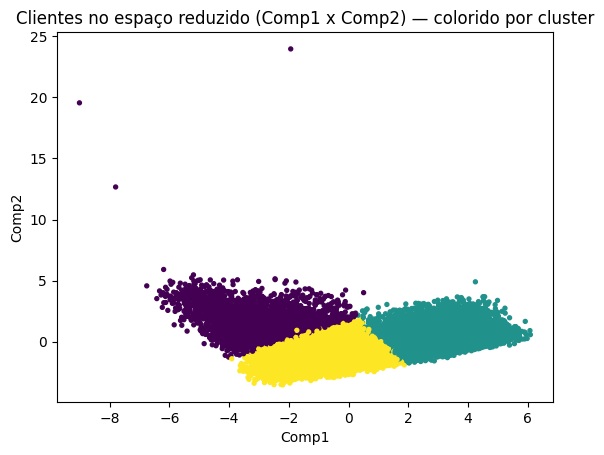

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(Xc_red[:, 0], Xc_red[:, 1], c=clusters, s=8)
plt.title("Clientes no espaço reduzido (Comp1 x Comp2) — colorido por cluster")
plt.xlabel("Comp1")
plt.ylabel("Comp2")
plt.show()

Verificando se todas as colunas existem e estão em conformidade.

In [ ]:
needed = [
    "Credit_Mix", "Outstanding_Debt", "Interest_Rate", "Delay_from_due_date",
    "Num_Credit_Card", "Changed_Credit_Limit", "Payment_of_Min_Amount",
    "Credit_History_Age_Months", "Total_EMI_per_month", "Num_Bank_Accounts"
]

missing = [c for c in needed if c not in X_test.columns]
print("Colunas faltando no X_test:", missing)
print("OK" if len(missing)==0 else "⚠️ Se faltarem, me diga quais para eu ajustar com você.")

Colunas faltando no X_test: []
OK


Sistema especialista (regras) alinhado com o gráfico, mais explicação (reasons)

In [ ]:
import numpy as np
import pandas as pd

def rule_engine(row):
    points = 0
    reasons = []

    # 1) Credit_Mix (TOP 1 do gráfico)
    cm = str(row.get("Credit_Mix", "")).strip().lower()
    if cm == "bad":
        points += 3
        reasons.append("Credit_Mix = Bad (+3)")
    elif cm == "standard":
        points += 1
        reasons.append("Credit_Mix = Standard (+1)")
    elif cm == "good":
        points += 0
        reasons.append("Credit_Mix = Good (+0)")

    # 2) Outstanding_Debt (TOP 2)
    debt = row.get("Outstanding_Debt", 0)
    if pd.notna(debt) and debt > 2000:
        points += 2
        reasons.append("Outstanding_Debt > 2000 (+2)")

    # 3) Interest_Rate (TOP 3)
    ir = row.get("Interest_Rate", 0)
    if pd.notna(ir) and ir > 20:
        points += 2
        reasons.append("Interest_Rate > 20 (+2)")

    # 4) Delay_from_due_date (TOP 4)
    delay = row.get("Delay_from_due_date", 0)
    if pd.notna(delay) and delay > 15:
        points += 2
        reasons.append("Delay_from_due_date > 15 (+2)")

    # 5) Num_Credit_Card (TOP 5) — sinal de exposição (leve)
    ncard = row.get("Num_Credit_Card", 0)
    if pd.notna(ncard) and ncard >= 6:
        points += 1
        reasons.append("Num_Credit_Card >= 6 (+1)")

    # 6) Changed_Credit_Limit (TOP 6) — instabilidade (leve)
    ccl = row.get("Changed_Credit_Limit", 0)
    if pd.notna(ccl) and abs(ccl) > 10:
        points += 1
        reasons.append("|Changed_Credit_Limit| > 10 (+1)")

    # 7) Payment_of_Min_Amount (TOP 7)
    pmin = str(row.get("Payment_of_Min_Amount", "")).strip().lower()
    if pmin == "yes":
        points += 1
        reasons.append("Payment_of_Min_Amount = Yes (+1)")

    # 8) Credit_History_Age_Months (TOP 8)
    age = row.get("Credit_History_Age_Months", 999)
    if pd.notna(age) and age < 24:
        points += 1
        reasons.append("Credit_History_Age_Months < 24 (+1)")

    # 9) Total_EMI_per_month (TOP 9) — peso mensal (leve)
    emi = row.get("Total_EMI_per_month", 0)
    if pd.notna(emi) and emi > 500:
        points += 1
        reasons.append("Total_EMI_per_month > 500 (+1)")

    # 10) Num_Bank_Accounts (TOP 10) — exposição/complexidade (leve)
    nba = row.get("Num_Bank_Accounts", 0)
    if pd.notna(nba) and nba >= 8:
        points += 1
        reasons.append("Num_Bank_Accounts >= 8 (+1)")

    # Mapeamento em 3 classes (ajustado para pontuação máxima possível)
    # max ~ 3+2+2+2+1+1+1+1+1+1 = 15
    if points >= 8:
        pred = "Poor"
    elif points >= 4:
        pred = "Standard"
    else:
        pred = "Good"

    return pred, points, reasons

# Rodar no X_test
rule_out = X_test.apply(lambda r: rule_engine(r), axis=1)
y_pred_rules = rule_out.apply(lambda x: x[0])
rule_points  = rule_out.apply(lambda x: x[1])

print(y_pred_rules.value_counts())

Good        8853
Standard    5877
Poor        5270
Name: count, dtype: int64


Avaliação das regras (com as mesmas métricas do Machine Learning)

=== Sistema Especialista (Regras) ===
Accuracy: 0.5191
F1-macro: 0.5252

Report:
               precision    recall  f1-score   support

        Good       0.37      0.88      0.52      3694
        Poor       0.60      0.55      0.57      5726
    Standard       0.68      0.38      0.48     10580

    accuracy                           0.52     20000
   macro avg       0.55      0.60      0.53     20000
weighted avg       0.60      0.52      0.52     20000



<Figure size 640x480 with 0 Axes>

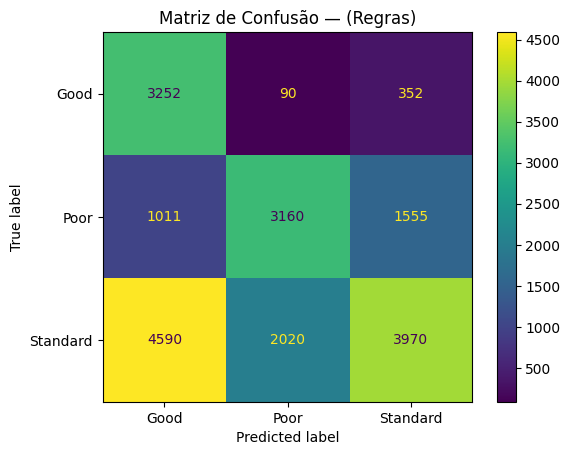

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

acc_rules = accuracy_score(y_test, y_pred_rules)
f1_rules  = f1_score(y_test, y_pred_rules, average="macro")

print("=== Sistema Especialista (Regras) ===")
print("Accuracy:", round(acc_rules, 4))
print("F1-macro:", round(f1_rules, 4))
print("\nReport:\n", classification_report(y_test, y_pred_rules))

plt.figure()
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rules)
plt.title("Matriz de Confusão — (Regras)")
plt.show()

Comparação entre as Regras vs HistGB

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import HistGradientBoostingClassifier

try:
    best_pipe
except NameError:
    best_pipe = Pipeline(steps=[
        ("prep", preprocess),
        ("model", HistGradientBoostingClassifier(random_state=42))
    ])
    best_pipe.fit(X_train, y_train)

y_pred_ml = best_pipe.predict(X_test)

acc_ml = accuracy_score(y_test, y_pred_ml)
f1_ml  = f1_score(y_test, y_pred_ml, average="macro")

compare = pd.DataFrame([
    ["HistGB (ML)", acc_ml, f1_ml],
    ["Sistema Especialista (Regras)", acc_rules, f1_rules],
], columns=["abordagem", "accuracy", "f1_macro"]).sort_values("f1_macro", ascending=False)

compare


,abordagem,accuracy,f1_macro
0,HistGB (ML),0.7054,0.685306
1,Sistema Especialista (Regras),0.5191,0.525198


Sistema que gera valor: saída final (classe + probabilidade + fatores + ação)

In [ ]:
def recommended_action(pred_class):
    if pred_class == "Good":
        return "Aprovar automático (limite padrão / condições melhores)."
    if pred_class == "Standard":
        return "Aprovar com limite menor / taxa ajustada / solicitar documentos adicionais."
    return "Encaminhar para análise manual ou negar (política de risco)."

def credit_decision(row_dict, use_ml_as_final=True):
    row = pd.Series(row_dict)

    # ML
    ml_pred = best_pipe.predict(pd.DataFrame([row]))[0]
    if hasattr(best_pipe, "predict_proba"):
        proba = best_pipe.predict_proba(pd.DataFrame([row]))[0]
        proba_dict = {c: float(p) for c, p in zip(best_pipe.classes_, proba)}
    else:
        proba_dict = None

    # Regras (explicável)
    rule_pred, points, reasons = rule_engine(row)

    # decisão final (default: ML)
    final_pred = ml_pred if use_ml_as_final else rule_pred

    return {
        "final_pred": final_pred,
        "ml_pred": ml_pred,
        "ml_proba": proba_dict,
        "rule_pred": rule_pred,
        "rule_points": int(points),
        "rule_reasons": reasons[:6],  # limita para não ficar enorme
        "recommended_action": recommended_action(final_pred)
    }

# Teste com 1 cliente do X_test
sample = X_test.iloc[0].to_dict()
credit_decision(sample)

{'final_pred': 'Standard',
 'ml_pred': 'Standard',
 'ml_proba': {'Good': 0.007698091981221296,
  'Poor': 0.00840185588428876,
  'Standard': 0.9839000521344899},
 'rule_pred': 'Good',
 'rule_points': 2,
 'rule_reasons': ['Credit_Mix = Standard (+1)',
  'Payment_of_Min_Amount = Yes (+1)'],
 'recommended_action': 'Aprovar com limite menor / taxa ajustada / solicitar documentos adicionais.'}

Exibição de 10 casos com explicação (para print) - Case Study

In [ ]:
outs = []
for i in range(10):
    out = credit_decision(X_test.iloc[i].to_dict())
    outs.append({
        "final_pred": out["final_pred"],
        "ml_pred": out["ml_pred"],
        "rule_pred": out["rule_pred"],
        "rule_points": out["rule_points"],
        "action": out["recommended_action"],
        "reasons": " | ".join(out["rule_reasons"])
    })

pd.DataFrame(outs)

,final_pred,ml_pred,rule_pred,rule_points,action,reasons
0,Standard,Standard,Good,2,Aprovar com limite menor / taxa ajustada / sol...,Credit_Mix = Standard (+1) | Payment_of_Min_Am...
1,Standard,Standard,Good,1,Aprovar com limite menor / taxa ajustada / sol...,Credit_Mix = Standard (+1)
2,Standard,Standard,Good,2,Aprovar com limite menor / taxa ajustada / sol...,Credit_Mix = Standard (+1) | Payment_of_Min_Am...
3,Standard,Standard,Good,1,Aprovar com limite menor / taxa ajustada / sol...,Payment_of_Min_Amount = Yes (+1)
4,Standard,Standard,Good,1,Aprovar com limite menor / taxa ajustada / sol...,Payment_of_Min_Amount = Yes (+1)
5,Standard,Standard,Good,2,Aprovar com limite menor / taxa ajustada / sol...,Credit_Mix = Standard (+1) | Payment_of_Min_Am...
6,Standard,Standard,Good,2,Aprovar com limite menor / taxa ajustada / sol...,Credit_Mix = Standard (+1) | Payment_of_Min_Am...
7,Standard,Standard,Good,2,Aprovar com limite menor / taxa ajustada / sol...,Credit_Mix = Standard (+1) | Payment_of_Min_Am...
8,Standard,Standard,Standard,4,Aprovar com limite menor / taxa ajustada / sol...,Credit_Mix = Standard (+1) | Delay_from_due_da...
9,Standard,Standard,Standard,5,Aprovar com limite menor / taxa ajustada / sol...,Credit_Mix = Standard (+1) | Delay_from_due_da...
